In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import zipfile

## Data preparation

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/weisseRE/Pyprojects"

zf = zipfile.ZipFile(DOWNLOAD_ROOT+r'\463703660_T_ONTIME_REPORTING.zip') 
df = pd.read_csv(zf.open(DOWNLOAD_ROOT+r'\463703660_T_ONTIME_REPORTING_2019_5.csv.csv'))

#df = pd.read_csv(r'C:\Users\eweiss\my-project-folder\463703660_T_ONTIME_REPORTING_2019_5.csv') #main data
dfcancel = pd.read_csv(DOWNLOAD_ROOT+r'\L_CANCELLATION.csv') #cancellation code meanings
dfcarriers = pd.read_csv(DOWNLOAD_ROOT+r'\L_UNIQUE_CARRIERS.csv') #carrier codes to airline

In [7]:
#dictcarriers = dfcarriers.set_index('Code').to_dict()
dictcarriers = dict(zip(dfcarriers['Code'],dfcarriers['Description']))
df['Airline'] = df['OP_UNIQUE_CARRIER'].map(dictcarriers)
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [11]:
#Number of flights in a given day - do more occur when there are more flights?
daysflights = df['FL_DATE'].value_counts()
daysflights = daysflights.to_frame()
df=df.merge(daysflights,left_on='FL_DATE', right_on=daysflights.index) #
df = df.drop(['FL_DATE_x','Unnamed: 42'],axis=1)
df = df.rename(columns={'FL_DATE_y':'DaysFlights'})

In [12]:
#Days of week with most flights
weeklytravel = df['DAY_OF_WEEK'].value_counts()
weeklytravel=weeklytravel.sort_index()
weeklytravel=weeklytravel.to_frame()
weeklytravel['Percent'] = weeklytravel['DAY_OF_WEEK'].apply(lambda x: x/sum(weeklytravel['DAY_OF_WEEK']))
weeklytravel

,DAY_OF_WEEK,Percent
1,85311,0.134055
2,83268,0.130844
3,105178,0.165273
4,107754,0.169321
5,108134,0.169918
6,67990,0.106837
7,78755,0.123753


## Data Exploration

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix['DaysFlights'].sort_values(ascending=False)

DaysFlights              1.000000
ARR_DEL15                0.041354
DEP_DEL15                0.040918
DAY_OF_MONTH             0.025588
ARR_DELAY                0.024887
DEP_TIME                 0.020097
DEP_DELAY                0.018480
CRS_DEP_TIME             0.017337
DEP_DELAY_NEW            0.014458
ARR_DELAY_NEW            0.012879
LATE_AIRCRAFT_DELAY      0.001027
ARR_TIME                 0.000024
CANCELLED               -0.001066
DIVERTED                -0.001212
DEST_CITY_MARKET_ID     -0.002696
ORIGIN_CITY_MARKET_ID   -0.002892
SECURITY_DELAY          -0.003124
OP_CARRIER_AIRLINE_ID   -0.005319
ORIGIN_AIRPORT_SEQ_ID   -0.005797
ORIGIN_AIRPORT_ID       -0.005797
DEST_AIRPORT_ID         -0.006367
DEST_AIRPORT_SEQ_ID     -0.006367
ACTUAL_ELAPSED_TIME     -0.010505
CRS_ELAPSED_TIME        -0.014860
CARRIER_DELAY           -0.017106
AIR_TIME                -0.017491
DISTANCE                -0.017635
NAS_DELAY               -0.017763
WEATHER_DELAY           -0.046951
DAY_OF_WEEK   

In [15]:
df.corr()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DaysFlights
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_MONTH,NaN,NaN,1.000000,-0.052861,0.002838,0.000210,0.000210,0.000877,0.000179,0.000179,...,0.001327,-0.000741,0.000188,0.002250,0.001848,-0.025240,0.060304,-0.003979,-0.013076,0.025588
DAY_OF_WEEK,NaN,NaN,-0.052861,1.000000,0.006494,0.004577,0.004577,0.003324,0.004332,0.004332,...,0.011098,0.010565,0.011193,0.013091,0.002279,0.003787,-0.015477,0.003792,-0.013222,-0.471415
OP_CARRIER_AIRLINE_ID,NaN,NaN,0.002838,0.006494,1.000000,-0.047454,-0.047454,0.035353,-0.047435,-0.047435,...,-0.090850,-0.077481,-0.118098,-0.133355,0.002008,0.034200,0.091582,-0.011925,0.023571,-0.005319
ORIGIN_AIRPORT_ID,NaN,NaN,0.000210,0.004577,-0.047454,1.000000,1.000000,0.633919,0.015040,0.015041,...,0.070561,0.070953,0.072613,0.089546,0.004795,-0.023362,-0.003918,-0.000295,0.009970,-0.005797
ORIGIN_AIRPORT_SEQ_ID,NaN,NaN,0.000210,0.004577,-0.047454,1.000000,1.000000,0.633918,0.015041,0.015041,...,0.070561,0.070953,0.072613,0.089546,0.004795,-0.023362,-0.003919,-0.000295,0.009970,-0.005797
ORIGIN_CITY_MARKET_ID,NaN,NaN,0.000877,0.003324,0.035353,0.633919,0.633918,1.000000,-0.008920,-0.008920,...,0.012897,0.011396,0.013095,0.015855,0.006914,-0.016481,0.021873,0.001230,0.014809,-0.002892
DEST_AIRPORT_ID,NaN,NaN,0.000179,0.004332,-0.047435,0.015040,0.015041,-0.008920,1.000000,1.000000,...,0.100920,0.100746,0.106084,0.090097,-0.002565,-0.009924,-0.017931,-0.000592,-0.015087,-0.006367
DEST_AIRPORT_SEQ_ID,NaN,NaN,0.000179,0.004332,-0.047435,0.015041,0.015041,-0.008920,1.000000,1.000000,...,0.100920,0.100747,0.106085,0.090097,-0.002565,-0.009924,-0.017931,-0.000592,-0.015087,-0.006367


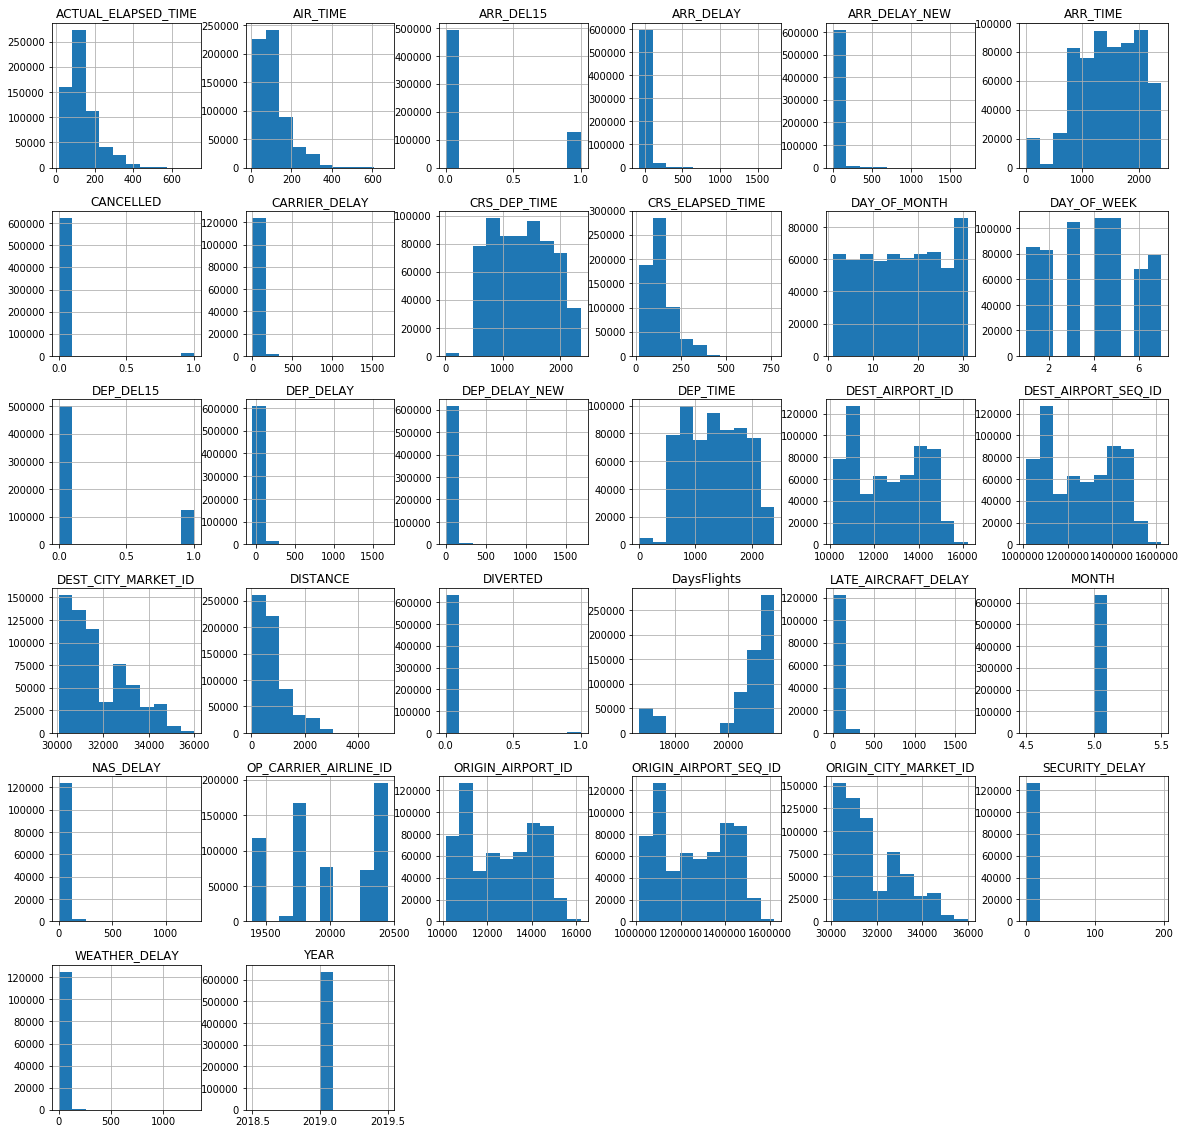

In [16]:
df.hist(figsize=(20,20))
plt.show()

In [17]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DaysFlights
count,636390.0,636390.0,636390.000000,636390.000000,636390.000000,636390.000000,6.363900e+05,636390.000000,636390.000000,6.363900e+05,...,636390.000000,621339.000000,621339.000000,636390.000000,126283.000000,126283.000000,126283.000000,126283.000000,126283.000000,636390.000000
mean,2019.0,5.0,16.009959,3.925725,19984.105877,12643.019216,1.264306e+06,31741.330731,12642.884070,1.264292e+06,...,140.913391,136.251471,111.528657,797.510615,19.979205,4.635327,17.147930,0.059398,28.467038,20650.127117
std,0.0,0.0,8.963635,1.897543,374.714881,1522.870925,1.522869e+05,1304.445148,1522.848545,1.522846e+05,...,72.350625,73.113491,70.949756,591.975257,59.325044,34.911438,40.441395,1.746088,54.503711,1473.465561
min,2019.0,5.0,1.000000,1.000000,19393.000000,10135.000000,1.013505e+06,30070.000000,10135.000000,1.013505e+06,...,20.000000,15.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16670.000000
25%,2019.0,5.0,8.000000,2.000000,19790.000000,11292.000000,1.129202e+06,30693.000000,11292.000000,1.129202e+06,...,90.000000,84.000000,60.000000,368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20699.000000
50%,2019.0,5.0,16.000000,4.000000,19977.000000,12889.000000,1.288903e+06,31453.000000,12889.000000,1.288903e+06,...,122.000000,118.000000,93.000000,632.000000,0.000000,0.000000,2.000000,0.000000,4.000000,21193.000000
75%,2019.0,5.0,24.000000,5.000000,20368.000000,13930.000000,1.393007e+06,32467.000000,13930.000000,1.393007e+06,...,170.000000,166.000000,140.000000,1024.000000,17.000000,0.000000,20.000000,0.000000,35.000000,21578.000000
max,2019.0,5.0,31.000000,7.000000,20452.000000,16218.000000,1.621802e+06,35991.000000,16218.000000,1.621802e+06,...,770.000000,714.000000,675.000000,5095.000000,1690.000000,1299.000000,1265.000000,196.000000,1651.000000,21725.000000


## Exploring Delays

In [18]:
corr_matrix['DEP_DELAY'].sort_values(ascending=False)

DEP_DELAY                1.000000
DEP_DELAY_NEW            0.997553
ARR_DELAY_NEW            0.972343
ARR_DELAY                0.963048
DEP_DEL15                0.598437
CARRIER_DELAY            0.583867
ARR_DEL15                0.554515
LATE_AIRCRAFT_DELAY      0.538311
WEATHER_DELAY            0.347045
NAS_DELAY                0.200363
DEP_TIME                 0.146458
CRS_DEP_TIME             0.119137
ACTUAL_ELAPSED_TIME      0.031294
CANCELLED                0.030700
CRS_ELAPSED_TIME         0.023864
AIR_TIME                 0.021814
ARR_TIME                 0.020431
DISTANCE                 0.018902
DaysFlights              0.018480
DIVERTED                 0.015645
DAY_OF_WEEK              0.003709
SECURITY_DELAY           0.002887
DAY_OF_MONTH            -0.000249
DEST_AIRPORT_SEQ_ID     -0.000930
DEST_AIRPORT_ID         -0.000930
OP_CARRIER_AIRLINE_ID   -0.006825
ORIGIN_AIRPORT_SEQ_ID   -0.007552
ORIGIN_AIRPORT_ID       -0.007552
DEST_CITY_MARKET_ID     -0.010046
ORIGIN_CITY_MA

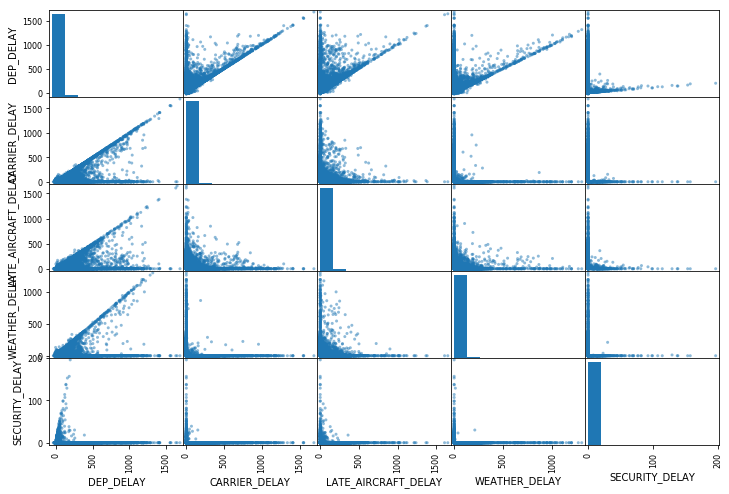

In [19]:
#Scatter Matrix of some attributes of interest
attributes = ['DEP_DELAY','CARRIER_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','SECURITY_DELAY']
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

In [20]:
#Total Number of Delays
delays = len(df[df['DEP_DELAY_NEW']!=0])-len(df[df['DEP_DELAY_NEW'].isna()])
#Total Delay Minutes
delayminutes = sum(df['DEP_DELAY_NEW'].fillna(0))
delaydict = {}

## Late Arriving Aircraft Delays

In [21]:
#Number of Late Aircraft Delays
LateDelays = len(df[df['LATE_AIRCRAFT_DELAY']!=0])-len(df[df['LATE_AIRCRAFT_DELAY'].isna()])

In [22]:
#%of Delays to due Late Aircraft
print("Of all delays in May {:0.2%}".format(LateDelays/delays) + ' were due to Late Aircraft')

Of all delays in May 29.62% were due to Late Aircraft


In [295]:
#Total Late Aircraft Delay Minutes
LateMinutes = sum(df['LATE_AIRCRAFT_DELAY'].fillna(0))

In [296]:
#Late Aircraft share of Delay Minutes
Latepct = LateMinutes/delayminutes
delaydict.update({'LateAircraft':[LateDelays,LateMinutes,Latepct]})
print("Late Aircraft related delays contributed {:0.2%} ".format(Latepct) + "of total delay minutes")

Late Aircraft related delays contributed 38.07% of total delay minutes


## Weather Delays

In [297]:
#Number of Weather Delays
weatherdelay = len(df[df['WEATHER_DELAY']!=0])-len(df[df['WEATHER_DELAY'].isna()])

In [298]:
#%of Delays to due Weather
print("Of all delays in May {:0.2%}".format(weatherdelay/delays) + ' were due to weather')

Of all delays in May 3.74% were due to weather


In [299]:
#Total Weather Delay Minutes
weatherminutes = sum(df['WEATHER_DELAY'].fillna(0))

In [300]:
#Weather share of Delay Minutes
weatherpct = weatherminutes/delayminutes
delaydict.update({'WeatherDelays':[weatherdelay,weatherminutes,weatherpct]})
print("Weather related delays contributed {:0.2%} ".format(weatherpct) + "of total delay minutes")

Weather related delays contributed 6.20% of total delay minutes


## Carrier Delays

In [301]:
#Number of Carrier Delays
carrierdelay = len(df[df['CARRIER_DELAY']!=0])-len(df[df['CARRIER_DELAY'].isna()])

In [302]:
#%of Delays to due Carrier
print("Of all delays in May {:0.2%}".format(carrierdelay/delays) + ' were due to issues within the airlines control')

Of all delays in May 27.31% were due to issues within the airlines control


In [303]:
#Total Carrier Delay Minutes
carrierminutes = sum(df['CARRIER_DELAY'].fillna(0))

#Carrier share of Delay Minutes
carrierpct= carrierminutes/delayminutes
delaydict.update({'CarrierDelay':[carrierdelay,carrierminutes,carrierpct]})
print("Carrier related delays contributed {:0.2%} ".format(carrierpct) + "of total delay minutes")

Carrier related delays contributed 26.72% of total delay minutes


In [314]:
dfdelay = pd.DataFrame.from_dict(delaydict)

In [315]:
dfdelay = dfdelay.T
dfdelay.columns = ['Delays','Minutes','Percent_Minutes']
#dfdelay['Delays'] = dfdelay.apply(lambda x: "{:,}".format(x['Delays']), axis=1)
#dfdelay['Minutes'] = dfdelay.apply(lambda x: "{:,}".format(x['Minutes']), axis=1)
#dfdelay['Percent_Minutes'] = dfdelay['Minutes'].apply(lambda x: x/sum(dfdelay['Minutes']))
dfdelay['Percent_Minutes'] = dfdelay.apply(lambda x: "{:0.2%}".format(x['Percent_Minutes']), axis=1)

In [316]:
dfdelay

,Delays,Minutes,Percent_Minutes
LateAircraft,66828.0,3594903.0,38.07%
WeatherDelays,8435.0,585363.0,6.20%
CarrierDelay,61600.0,2523034.0,26.72%


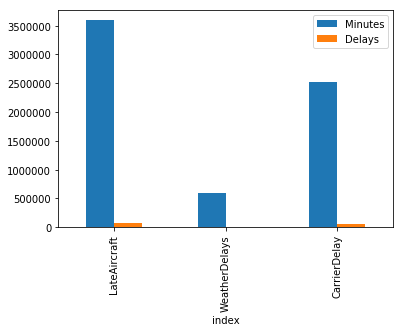

In [313]:
#two axis would work better?
dfdelay.reset_index().plot(x='index', y=["Minutes", "Delays"], kind="bar")

## Carrier Delays contribute a significant portion of delays, are particular airlines worse?

In [24]:
dfairline = df.groupby('Airline').sum()

In [43]:
#Carrier Delay Minutes
airlinedelays = dfairline['CARRIER_DELAY'].sort_values(ascending=False)

In [44]:
#flights
airlineflights = df['Airline'].value_counts()

In [52]:
#most delayed minutes
airlinedelays.sort_values(ascending=False)

Airline
American Airlines Inc.     455936.0
Southwest Airlines Co.     438658.0
SkyWest Airlines Inc.      346638.0
Delta Air Lines Inc.       271562.0
United Air Lines Inc.      215472.0
JetBlue Airways            122894.0
Mesa Airlines Inc.          95388.0
Envoy Air                   90168.0
PSA Airlines Inc.           72830.0
ExpressJet Airlines LLC     63693.0
Republic Airline            63364.0
Spirit Air Lines            61329.0
Frontier Airlines Inc.      60248.0
Endeavor Air Inc.           57172.0
Alaska Airlines Inc.        47456.0
Allegiant Air               43249.0
Hawaiian Airlines Inc.      16977.0
Name: CARRIER_DELAY, dtype: float64

In [53]:
#number of flights
airlineflights

Southwest Airlines Co.     117849
Delta Air Lines Inc.        85579
American Airlines Inc.      81666
SkyWest Airlines Inc.       72041
United Air Lines Inc.       54360
Envoy Air                   28795
Republic Airline            28147
JetBlue Airways             24967
PSA Airlines Inc.           24783
Alaska Airlines Inc.        22567
Endeavor Air Inc.           21074
Mesa Airlines Inc.          19594
Spirit Air Lines            18055
Frontier Airlines Inc.      11383
ExpressJet Airlines LLC      9290
Allegiant Air                9021
Hawaiian Airlines Inc.       7219
Name: Airline, dtype: int64

In [47]:
#Delay Minutes per Flight
carrdelay = airlinedelays/airlineflights
carrdelay.sort_values(ascending=False)

ExpressJet Airlines LLC    6.856082
American Airlines Inc.     5.582935
Frontier Airlines Inc.     5.292805
JetBlue Airways            4.922257
Mesa Airlines Inc.         4.868225
SkyWest Airlines Inc.      4.811677
Allegiant Air              4.794258
United Air Lines Inc.      3.963797
Southwest Airlines Co.     3.722204
Spirit Air Lines           3.396788
Delta Air Lines Inc.       3.173232
Envoy Air                  3.131377
PSA Airlines Inc.          2.938708
Endeavor Air Inc.          2.712916
Hawaiian Airlines Inc.     2.351711
Republic Airline           2.251181
Alaska Airlines Inc.       2.102894
dtype: float64

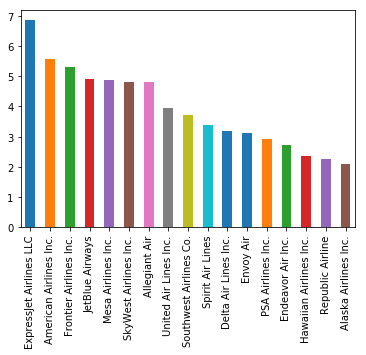

In [51]:
#Bar Plot of Delay Minutes per Flight
carrdelay.sort_values(ascending=False).plot.bar()

# Further investigation on Delays:
### Planned vs actual flight times - Late Arriving Planes are a significant contributor to delays
### Flight times post delay - are they able to make up lost time

# Cancellations

In [60]:
#Cancellation Causes
df1 = df['CANCELLATION_CODE'].fillna('None')

In [61]:
df1 = df1.to_frame().merge(dfcancel, left_on='CANCELLATION_CODE',right_on='Code').drop(['CANCELLATION_CODE'], axis = 1)
df1 = df1.groupby('Description').count()
df1['Percent'] = df1['Code'].apply(lambda x: x/sum(df1['Code']))

In [71]:
#Cancellation dataframe
df1

,Code,Percent
Description,,
Carrier,4704,0.361512
National Air System,2076,0.159545
Weather,6232,0.478943
